In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_india_cleaned_tokenized.csv")

In [18]:
data 

,content,place,year,month,content_token
0,districts continue affected massive unpreceden...,India,2022,August,"['districts', 'continue', 'affected', 'massive..."
1,happiest birthday jeon freakin man cause,India,2022,August,"['happiest', 'birthday', 'jeon', 'freakin', 'm..."
2,money support developing countries cope advers...,India,2022,August,"['money', 'support', 'developing', 'countries'..."
3,volunteer visit,India,2022,August,"['volunteer', 'visit']"
4,science religion created people religion atroc...,India,2022,August,"['science', 'religion', 'created', 'people', '..."
...,...,...,...,...,...
17433,good morning surat truly affected mnpinfotech,India,2010,October,"['good', 'morning', 'surat', 'truly', 'affecte..."
17434,alrdy facing,India,2010,October,"['alrdy', 'facing']"
17435,rt archaeological frontier,India,2010,October,"['rt', 'archaeological', 'frontier']"
17436,NaN,India,2010,October,[]


In [45]:
data.dropna(inplace = True)

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [47]:
data['negative'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neg'])
data['neutral'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neu'])
data['positive'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['pos'])
data['compound'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['compound'])
data

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,districts continue affected massive unpreceden...,India,2022,August,"['districts', 'continue', 'affected', 'massive...",0.460,0.397,0.143,-0.4588,negative
1,happiest birthday jeon freakin man cause,India,2022,August,"['happiest', 'birthday', 'jeon', 'freakin', 'm...",0.000,0.543,0.457,0.6369,positive
2,money support developing countries cope advers...,India,2022,August,"['money', 'support', 'developing', 'countries'...",0.205,0.574,0.221,0.0516,neutral
3,volunteer visit,India,2022,August,"['volunteer', 'visit']",0.000,1.000,0.000,0.0000,neutral
4,science religion created people religion atroc...,India,2022,August,"['science', 'religion', 'created', 'people', '...",0.161,0.553,0.286,0.3612,positive
...,...,...,...,...,...,...,...,...,...,...
17432,must else could let killed two mosquitoes nove...,India,2010,November,"['must', 'else', 'could', 'let', 'killed', 'tw...",0.391,0.609,0.000,-0.6705,negative
17433,good morning surat truly affected mnpinfotech,India,2010,October,"['good', 'morning', 'surat', 'truly', 'affecte...",0.154,0.288,0.558,0.6369,positive
17434,alrdy facing,India,2010,October,"['alrdy', 'facing']",0.000,1.000,0.000,0.0000,neutral
17435,rt archaeological frontier,India,2010,October,"['rt', 'archaeological', 'frontier']",0.000,1.000,0.000,0.0000,neutral


In [48]:
data['content'][20]

'china highlights economic damage wrought warmingrecord heatwave behind power shortages paralysed industry probably caused scientists'

In [49]:
print(sid.polarity_scores("china highlights economic damage wrought warmingrecord heatwave behind power shortages paralysed industry probably caused scientists"))

{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5859}


In [50]:
data['comp_score'] = data['compound'].apply(lambda c: 'positive' if c > 0.3 else ('negative' if c< -0.3 else 'neutral'))

data.head() 

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,districts continue affected massive unpreceden...,India,2022,August,"['districts', 'continue', 'affected', 'massive...",0.460,0.397,0.143,-0.4588,negative
1,happiest birthday jeon freakin man cause,India,2022,August,"['happiest', 'birthday', 'jeon', 'freakin', 'm...",0.000,0.543,0.457,0.6369,positive
2,money support developing countries cope advers...,India,2022,August,"['money', 'support', 'developing', 'countries'...",0.205,0.574,0.221,0.0516,neutral
3,volunteer visit,India,2022,August,"['volunteer', 'visit']",0.000,1.000,0.000,0.0000,neutral
4,science religion created people religion atroc...,India,2022,August,"['science', 'religion', 'created', 'people', '...",0.161,0.553,0.286,0.3612,positive


In [51]:
data.to_csv("sentiments_india.csv", index =False)

In [52]:
data['comp_score'].value_counts()

neutral     8062
positive    5464
negative    3563
Name: comp_score, dtype: int64

In [53]:
data

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,districts continue affected massive unpreceden...,India,2022,August,"['districts', 'continue', 'affected', 'massive...",0.460,0.397,0.143,-0.4588,negative
1,happiest birthday jeon freakin man cause,India,2022,August,"['happiest', 'birthday', 'jeon', 'freakin', 'm...",0.000,0.543,0.457,0.6369,positive
2,money support developing countries cope advers...,India,2022,August,"['money', 'support', 'developing', 'countries'...",0.205,0.574,0.221,0.0516,neutral
3,volunteer visit,India,2022,August,"['volunteer', 'visit']",0.000,1.000,0.000,0.0000,neutral
4,science religion created people religion atroc...,India,2022,August,"['science', 'religion', 'created', 'people', '...",0.161,0.553,0.286,0.3612,positive
...,...,...,...,...,...,...,...,...,...,...
17432,must else could let killed two mosquitoes nove...,India,2010,November,"['must', 'else', 'could', 'let', 'killed', 'tw...",0.391,0.609,0.000,-0.6705,negative
17433,good morning surat truly affected mnpinfotech,India,2010,October,"['good', 'morning', 'surat', 'truly', 'affecte...",0.154,0.288,0.558,0.6369,positive
17434,alrdy facing,India,2010,October,"['alrdy', 'facing']",0.000,1.000,0.000,0.0000,neutral
17435,rt archaeological frontier,India,2010,October,"['rt', 'archaeological', 'frontier']",0.000,1.000,0.000,0.0000,neutral


In [54]:
sentiments = pd.DataFrame(data['comp_score'].value_counts()).reset_index()
sentiments.columns =['sentiment', 'no._of_people']

In [55]:
sentiments

,sentiment,no._of_people
0,neutral,8062
1,positive,5464
2,negative,3563


<AxesSubplot:xlabel='sentiment', ylabel='no._of_people'>

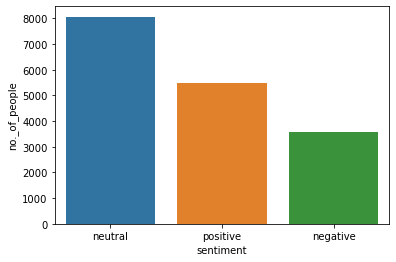

In [56]:
sns.barplot(x='sentiment', y = 'no._of_people', data =sentiments)

In [142]:
s=pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/sentiments.csv")

In [143]:
s

,Text,Like Count,Text_token,negative,neutral,positive,compound,comp_score
0,climate change scam steal tax money milankovic...,0,"['climate', 'change', 'scam', 'steal', 'tax', ...",0.610,0.325,0.065,-0.9246,negative
1,existing excess carbon dioxide atmosphere lead...,0,"['existing', 'excess', 'carbon', 'dioxide', 'a...",0.136,0.680,0.184,0.0516,neutral
2,2021 report intergovernmental panel droughts i...,5,"['2021', 'report', 'intergovernmental', 'panel...",0.168,0.710,0.123,-0.1779,neutral
3,global climate change turning knowledge action,2,"['global', 'climate', 'change', 'turning', 'kn...",0.000,1.000,0.000,0.0000,neutral
4,behind successful hoax swamp uses effectively ...,1,"['behind', 'successful', 'hoax', 'swamp', 'use...",0.196,0.448,0.356,0.6908,positive
...,...,...,...,...,...,...,...,...
117586,big philanthropy fight fund technologies mitig...,7,"['big', 'philanthropy', 'fight', 'fund', 'tech...",0.103,0.833,0.063,-0.2500,neutral
117587,climate change inaccurate fucking correct say ...,1,"['climate', 'change', 'inaccurate', 'fucking',...",0.243,0.643,0.114,-0.4215,negative
117588,little bit like global warming morphed climate...,0,"['little', 'bit', 'like', 'global', 'warming',...",0.000,0.611,0.389,0.4256,positive
117589,suggest change lifestyle reduce pollution 34 m...,0,"['suggest', 'change', 'lifestyle', 'reduce', '...",0.224,0.701,0.075,-0.4939,negative


In [57]:
# wordcloud for positive tweets
positive = data.query('comp_score == "positive"')
positive

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
1,happiest birthday jeon freakin man cause,India,2022,August,"['happiest', 'birthday', 'jeon', 'freakin', 'm...",0.000,0.543,0.457,0.6369,positive
4,science religion created people religion atroc...,India,2022,August,"['science', 'religion', 'created', 'people', '...",0.161,0.553,0.286,0.3612,positive
5,akshat think better things like,India,2022,August,"['akshat', 'think', 'better', 'things', 'like']",0.000,0.357,0.643,0.6597,positive
22,rapidly increases average surface temperature ...,India,2022,August,"['rapidly', 'increases', 'average', 'surface',...",0.000,0.769,0.231,0.5859,positive
26,report rapid turnarounds energy food equity re...,India,2022,August,"['report', 'rapid', 'turnarounds', 'energy', '...",0.000,0.606,0.394,0.6369,positive
...,...,...,...,...,...,...,...,...,...,...
17418,weather next week gonna like gonna less 30 deg...,India,2011,January,"['weather', 'next', 'week', 'gon', 'na', 'like...",0.000,0.783,0.217,0.3612,positive
17419,sounds similar uk glad im ya,India,2011,January,"['sounds', 'similar', 'uk', 'glad', 'im', 'ya']",0.000,0.625,0.375,0.4588,positive
17421,hahaha rt dear icebergs sorry hear karmas bitc...,India,2011,January,"['hahaha', 'rt', 'dear', 'icebergs', 'sorry', ...",0.263,0.258,0.479,0.6369,positive
17430,contributing already fd environment pollution ...,India,2010,November,"['contributing', 'already', 'fd', 'environment...",0.000,0.748,0.252,0.5719,positive


In [153]:
positive['Text'][117582]

'man michelle net ofyam didnt know thought everyone arms global warming thought natural climate change'

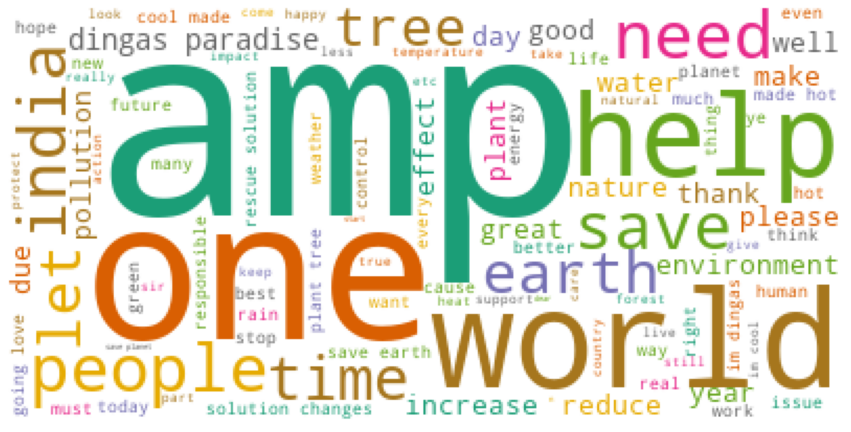

In [58]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(positive['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

In [59]:
negative = data.query('comp_score == "negative"')

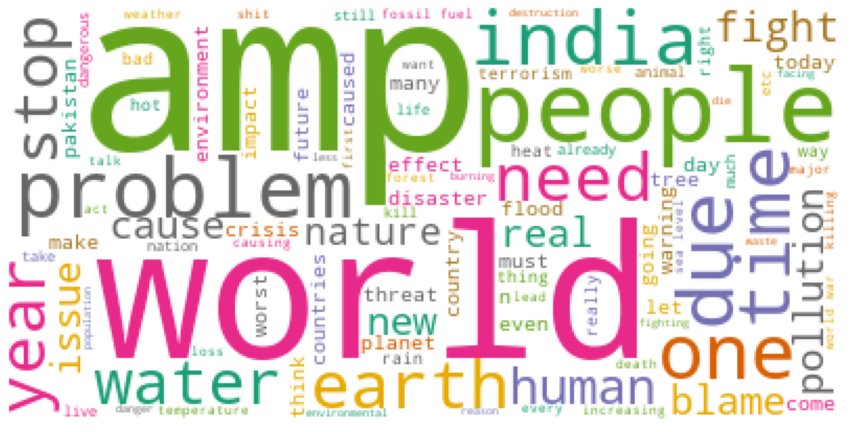

In [60]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(negative['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [61]:
neutral = data.query('comp_score == "neutral"')
neutral

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
2,money support developing countries cope advers...,India,2022,August,"['money', 'support', 'developing', 'countries'...",0.205,0.574,0.221,0.0516,neutral
3,volunteer visit,India,2022,August,"['volunteer', 'visit']",0.000,1.000,0.000,0.0000,neutral
6,gonna screw drought china heat waves across eu...,India,2022,August,"['gon', 'na', 'screw', 'drought', 'china', 'he...",0.107,0.763,0.130,0.0772,neutral
7,volunteer visit,India,2022,August,"['volunteer', 'visit']",0.000,1.000,0.000,0.0000,neutral
8,read little science geography would never talk...,India,2022,August,"['read', 'little', 'science', 'geography', 'wo...",0.130,0.649,0.221,0.2401,neutral
...,...,...,...,...,...,...,...,...,...,...
17429,rt rt stop,India,2010,November,"['rt', 'rt', 'stop']",0.524,0.476,0.000,-0.2960,neutral
17431,maybe every pair boobs world figure tht light ...,India,2010,November,"['maybe', 'every', 'pair', 'boobs', 'world', '...",0.000,1.000,0.000,0.0000,neutral
17434,alrdy facing,India,2010,October,"['alrdy', 'facing']",0.000,1.000,0.000,0.0000,neutral
17435,rt archaeological frontier,India,2010,October,"['rt', 'archaeological', 'frontier']",0.000,1.000,0.000,0.0000,neutral


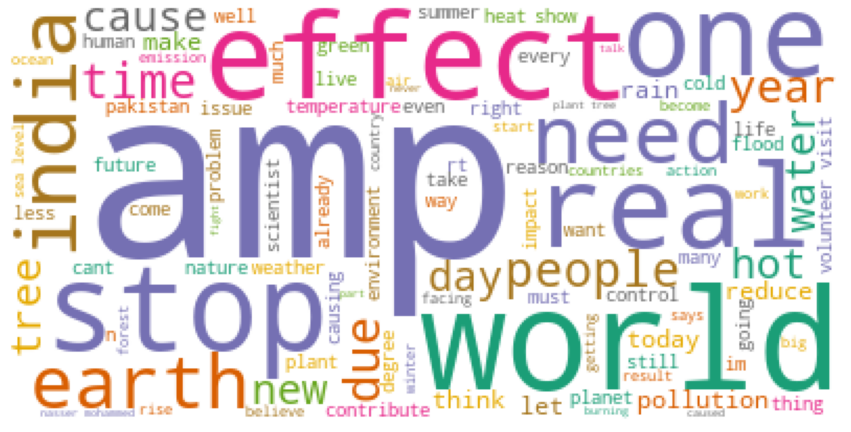

In [62]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(neutral['content'].astype(str).values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [152]:
data['Text'][117578]

'yall mfs stupid global warming means climate change snowing yes effect global warming'